# FLIGHT FARE PREDICTION


### Task 1

##### DATA ANALYSIS

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load data

file= 'Flight_Fare.xlsx'
data = pd.read_excel(file)

In [3]:
#basic checks
data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
data.tail

<bound method NDFrame.tail of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BO

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#data cleaning
# null value checks
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
#clear null value
data=data.dropna()

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
#encoding
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [14]:
#encode airline
data = pd.get_dummies(data, columns=['Airline'], drop_first=True)

In [15]:
#encode source and destination
data = pd.get_dummies(data, columns=['Source', 'Destination'], drop_first=True)

In [16]:
#encode total_stops(ordinal values to numeric values)
stops_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
data['Total_Stops'] = data['Total_Stops'].map(stops_mapping)

In [17]:
#drop useless columns
data = data.drop(['Additional_Info'], axis=1)
data = data.drop(['Route'], axis=1)


In [18]:
data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,05:50,13:15,7h 25m,2,7662,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,12/05/2019,18:05,23:30,5h 25m,1,6218,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,01/03/2019,16:50,21:35,4h 45m,1,13302,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
data.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Price', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date_of_Journey                            10682 non-null  object
 1   Dep_Time                                   10682 non-null  object
 2   Arrival_Time                               10682 non-null  object
 3   Duration                                   10682 non-null  object
 4   Total_Stops                                10682 non-null  int64 
 5   Price                                      10682 non-null  int64 
 6   Airline_Air India                          10682 non-null  bool  
 7   Airline_GoAir                              10682 non-null  bool  
 8   Airline_IndiGo                             10682 non-null  bool  
 9   Airline_Jet Airways                        10682 non-null  bool  
 10  Airline_Jet Airways Business           

In [21]:
#save preprocessed dateset
data.to_excel("preprocessed_data.xlsx", index=False)


In [22]:
data= pd.read_excel('preprocessed_data.xlsx')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Date_of_Journey                            10682 non-null  object
 1   Dep_Time                                   10682 non-null  object
 2   Arrival_Time                               10682 non-null  object
 3   Duration                                   10682 non-null  object
 4   Total_Stops                                10682 non-null  int64 
 5   Price                                      10682 non-null  int64 
 6   Airline_Air India                          10682 non-null  bool  
 7   Airline_GoAir                              10682 non-null  bool  
 8   Airline_IndiGo                             10682 non-null  bool  
 9   Airline_Jet Airways                        10682 non-null  bool  
 10  Airline_Jet Airways Business      

In [24]:
data.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,05:50,13:15,7h 25m,2,7662,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,12/05/2019,18:05,23:30,5h 25m,1,6218,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,01/03/2019,16:50,21:35,4h 45m,1,13302,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [25]:
data.describe

<bound method NDFrame.describe of       Date_of_Journey Dep_Time  Arrival_Time Duration  Total_Stops  Price  \
0          24/03/2019    22:20  01:10 22 Mar   2h 50m            0   3897   
1           1/05/2019    05:50         13:15   7h 25m            2   7662   
2           9/06/2019    09:25  04:25 10 Jun      19h            2  13882   
3          12/05/2019    18:05         23:30   5h 25m            1   6218   
4          01/03/2019    16:50         21:35   4h 45m            1  13302   
...               ...      ...           ...      ...          ...    ...   
10677       9/04/2019    19:55         22:25   2h 30m            0   4107   
10678      27/04/2019    20:45         23:20   2h 35m            0   4145   
10679      27/04/2019    08:20         11:20       3h            0   7229   
10680      01/03/2019    11:30         14:10   2h 40m            0  12648   
10681       9/05/2019    10:55         19:15   8h 20m            2  11753   

       Airline_Air India  Airline_GoAir  

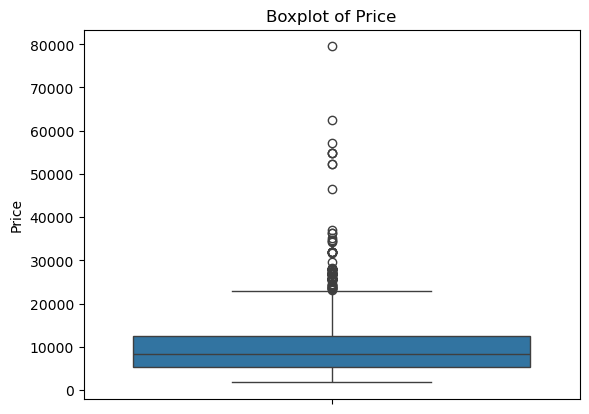

In [26]:
sns.boxplot(data=data['Price'])
plt.title("Boxplot of Price")
plt.show()


In [27]:
#clear outliers
Q1 = data['Price'].quantile(0.25)  # 25th percentile
Q3 = data['Price'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data within bounds
data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

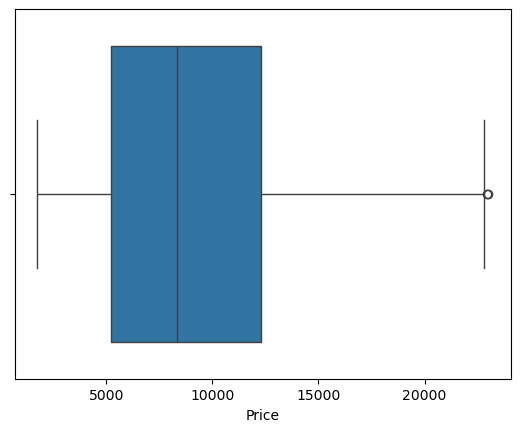

In [28]:
#check again
sns.boxplot(x=data['Price'])
plt.show()

In [29]:
# data.to_excel('cleaned_data.xlsx', index=False)
# print(data)

# REPORT - TASK 1

#### Objective

The objective of this task was to clean and preprocess the dataset to ensure it is suitable for further analysis and modeling. This involved identifying and handling missing values, detecting and removing outliers, and ensuring the dataset was well-structured and prepared for use in the subsequent tasks.

#### Steps Performed

1. Understanding the Dataset

The dataset was loaded and its structure was analyzed.

Key insights were drawn regarding the columns, data types, and the presence of categorical and numerical features.

2. Handling Missing Values

The dataset was checked for missing values using the isnull() function.

Missing data were handled by deleting them.

3. Detecting Outliers

A boxplot was generated for the Price column to visually inspect the presence of outliers.

Outliers were observed in the data, particularly in the Price column.

4. Removing Outliers

The Interquartile Range (IQR) method was applied:

Calculated Q1 (25th percentile) and Q3 (75th percentile).

Computed the IQR as Q3 – Q1.

Defined the lower bound as Q1 - 1.5 * IQR and the upper bound as Q3 + 1.5 * IQR.

Removed data points outside this range.

The cleaned dataset without outliers was successfully saved.

5. Saving the Preprocessed Dataset

The cleaned dataset was saved to an Excel file for future use:

Used the to_excel() method from pandas.

Verified the saved file to ensure all changes were applied correctly.

#### Results

The dataset was successfully cleaned and preprocessed.

Missing values were handled, and outliers were removed effectively.

The dataset is now ready for Exploratory Data Analysis (EDA) or modeling.

Tools and Libraries Used

Python (for data manipulation and preprocessing).

Pandas (for data loading and cleaning).

Seaborn and Matplotlib (for visualization).

### THANK YOU

# EDA

In [30]:
#date and time to numerical format
data['Journey_day'] = pd.to_datetime(data['Date_of_Journey'])
data['Journey_month'] = pd.to_datetime(data['Date_of_Journey'])
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time'])
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time'])

In [31]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

In [32]:
data=data.drop(columns=['Date_of_Journey'])

In [33]:
#converting duration into numerical
import re

def convert_duration(duration):
    hours = 0
    minutes = 0
    
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)h', duration)
    minute_match = re.search(r'(\d+)m', duration)

    if hour_match:
        hours = int(hour_match.group(1))  # Extract hours
    if minute_match:
        minutes = int(minute_match.group(1))  # Extract minutes

    return hours * 60 + minutes  # Convert total duration to minutes

# Apply the function to the column
data['Duration_Minutes'] = data['Duration'].apply(convert_duration)

# Drop the original Duration column (optional)
data.drop(columns=['Duration'], inplace=True)

# Check if conversion is successful
print(data[['Duration_Minutes']].head())



   Duration_Minutes
0               170
1               445
2              1140
3               325
4               285


In [34]:
data.columns

Index(['Dep_Time', 'Arrival_Time', 'Total_Stops', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey_day',
       'Journey_month', 'Arrival_hour', 'Arrival_min', 'Duration_Minutes'],
      dtype='object')

In [35]:
data.head()

,Dep_Time,Arrival_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_Minutes
0,2025-02-09 22:20:00,01:10 22 Mar,0,3897,False,False,True,False,False,False,...,False,False,False,False,True,2019-03-24,2019-03-24,2025-03-22 01:10:00,2025-03-22 01:10:00,170
1,2025-02-09 05:50:00,13:15,2,7662,True,False,False,False,False,False,...,False,False,False,False,False,2019-05-01,2019-05-01,2025-02-09 13:15:00,2025-02-09 13:15:00,445
2,2025-02-09 09:25:00,04:25 10 Jun,2,13882,False,False,False,True,False,False,...,True,False,False,False,False,2019-06-09,2019-06-09,2025-06-10 04:25:00,2025-06-10 04:25:00,1140
3,2025-02-09 18:05:00,23:30,1,6218,False,False,True,False,False,False,...,False,False,False,False,False,2019-05-12,2019-05-12,2025-02-09 23:30:00,2025-02-09 23:30:00,325
4,2025-02-09 16:50:00,21:35,1,13302,False,False,True,False,False,False,...,False,False,False,False,True,2019-03-01,2019-03-01,2025-02-09 21:35:00,2025-02-09 21:35:00,285


In [36]:
data.drop(['Arrival_Time'], axis=1, inplace=True)

In [37]:
data

,Dep_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Arrival_hour,Arrival_min,Duration_Minutes
0,2025-02-09 22:20:00,0,3897,False,False,True,False,False,False,False,...,False,False,False,False,True,2019-03-24,2019-03-24,2025-03-22 01:10:00,2025-03-22 01:10:00,170
1,2025-02-09 05:50:00,2,7662,True,False,False,False,False,False,False,...,False,False,False,False,False,2019-05-01,2019-05-01,2025-02-09 13:15:00,2025-02-09 13:15:00,445
2,2025-02-09 09:25:00,2,13882,False,False,False,True,False,False,False,...,True,False,False,False,False,2019-06-09,2019-06-09,2025-06-10 04:25:00,2025-06-10 04:25:00,1140
3,2025-02-09 18:05:00,1,6218,False,False,True,False,False,False,False,...,False,False,False,False,False,2019-05-12,2019-05-12,2025-02-09 23:30:00,2025-02-09 23:30:00,325
4,2025-02-09 16:50:00,1,13302,False,False,True,False,False,False,False,...,False,False,False,False,True,2019-03-01,2019-03-01,2025-02-09 21:35:00,2025-02-09 21:35:00,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,2025-02-09 19:55:00,0,4107,False,False,False,False,False,False,False,...,False,False,False,False,False,2019-04-09,2019-04-09,2025-02-09 22:25:00,2025-02-09 22:25:00,150
10678,2025-02-09 20:45:00,0,4145,True,False,False,False,False,False,False,...,False,False,False,False,False,2019-04-27,2019-04-27,2025-02-09 23:20:00,2025-02-09 23:20:00,155
10679,2025-02-09 08:20:00,0,7229,False,False,False,True,False,False,False,...,False,True,False,False,False,2019-04-27,2019-04-27,2025-02-09 11:20:00,2025-02-09 11:20:00,180
10680,2025-02-09 11:30:00,0,12648,False,False,False,False,False,False,False,...,False,False,False,False,True,2019-03-01,2019-03-01,2025-02-09 14:10:00,2025-02-09 14:10:00,160


In [38]:
data['Arrival_hours'] = pd.to_datetime(data['Arrival_hour']).dt.hour


In [39]:
data['Arrival_hours']

0         1
1        13
2         4
3        23
4        21
         ..
10677    22
10678    23
10679    11
10680    14
10681    19
Name: Arrival_hours, Length: 10588, dtype: int32

In [40]:
def categorize_hour(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function to Arrival_hour
# data['Arrival_hour'] = pd.to_datetime(data['Arrival_hour']).dt.hour  # Ensure it's integer
data['Arrival_period'] = data['Arrival_hours'].apply(categorize_hour)


In [53]:
data.head()


,Unnamed: 0,Dep_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_day,Journey_month,Duration_Minutes,Arrival_hours,Arrival_period,Arrival_mins,Arrival_minute_category
0,0,2025-02-09 22:20:00,0,3897,False,False,True,False,False,False,...,False,False,True,2019-03-24,2019-03-24,170,1,Night,10,Early
1,1,2025-02-09 05:50:00,2,7662,True,False,False,False,False,False,...,False,False,False,2019-05-01,2019-05-01,445,13,Afternoon,15,Mid
2,2,2025-02-09 09:25:00,2,13882,False,False,False,True,False,False,...,False,False,False,2019-06-09,2019-06-09,1140,4,Night,25,Mid
3,3,2025-02-09 18:05:00,1,6218,False,False,True,False,False,False,...,False,False,False,2019-05-12,2019-05-12,325,23,Night,30,Mid
4,4,2025-02-09 16:50:00,1,13302,False,False,True,False,False,False,...,False,False,True,2019-03-01,2019-03-01,285,21,Night,35,Mid


In [42]:
data['Arrival_mins'] = pd.to_datetime(data['Arrival_min']).dt.minute

In [43]:
def categorize_minute(minute):
    if 0 <= minute < 15:
        return "Early"
    elif 15 <= minute < 45:
        return "Mid"
    else:
        return "Late"


data['Arrival_minute_category'] = data['Arrival_mins'].apply(categorize_minute)


In [59]:
data.head()

,Unnamed: 0,Dep_Time,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Journey_day,Journey_month,Duration_Minutes,Arrival_hours,Arrival_period,Arrival_mins,Arrival_minute_category,Arrival_hour_category,Arrival_hour_cat,Arrival_min_cat
0,0,2025-02-09 22:20:00,0,3897,False,False,True,False,False,False,...,2019-03-24,2019-03-24,170,1,Night,10,Early,3,3,0
1,1,2025-02-09 05:50:00,2,7662,True,False,False,False,False,False,...,2019-05-01,2019-05-01,445,13,Afternoon,15,Mid,0,0,2
2,2,2025-02-09 09:25:00,2,13882,False,False,False,True,False,False,...,2019-06-09,2019-06-09,1140,4,Night,25,Mid,3,3,2
3,3,2025-02-09 18:05:00,1,6218,False,False,True,False,False,False,...,2019-05-12,2019-05-12,325,23,Night,30,Mid,3,3,2
4,4,2025-02-09 16:50:00,1,13302,False,False,True,False,False,False,...,2019-03-01,2019-03-01,285,21,Night,35,Mid,3,3,2


In [48]:
data.drop(['Arrival_hour', 'Arrival_min'], axis=1, inplace=True)


In [57]:
data['Arrival_hour_cat'] = data['Arrival_period'].astype('category').cat.codes
data['Arrival_min_cat'] = data['Arrival_minute_category'].astype('category').cat.codes


In [60]:
data.drop(['Arrival_period', 'Arrival_minute_category'], axis=1, inplace=True)

In [49]:
data.columns


Index(['Dep_Time', 'Total_Stops', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Journey_day',
       'Journey_month', 'Duration_Minutes', 'Arrival_hours', 'Arrival_period',
       'Arrival_mins', 'Arrival_minute_category'],
      dtype='object')

In [50]:
data.to_excel('cleandata.xlsx',index='False')

In [51]:
data=pd.read_excel('cleandata.xlsx')

### FEATURE CORRELATION ANALYSIS

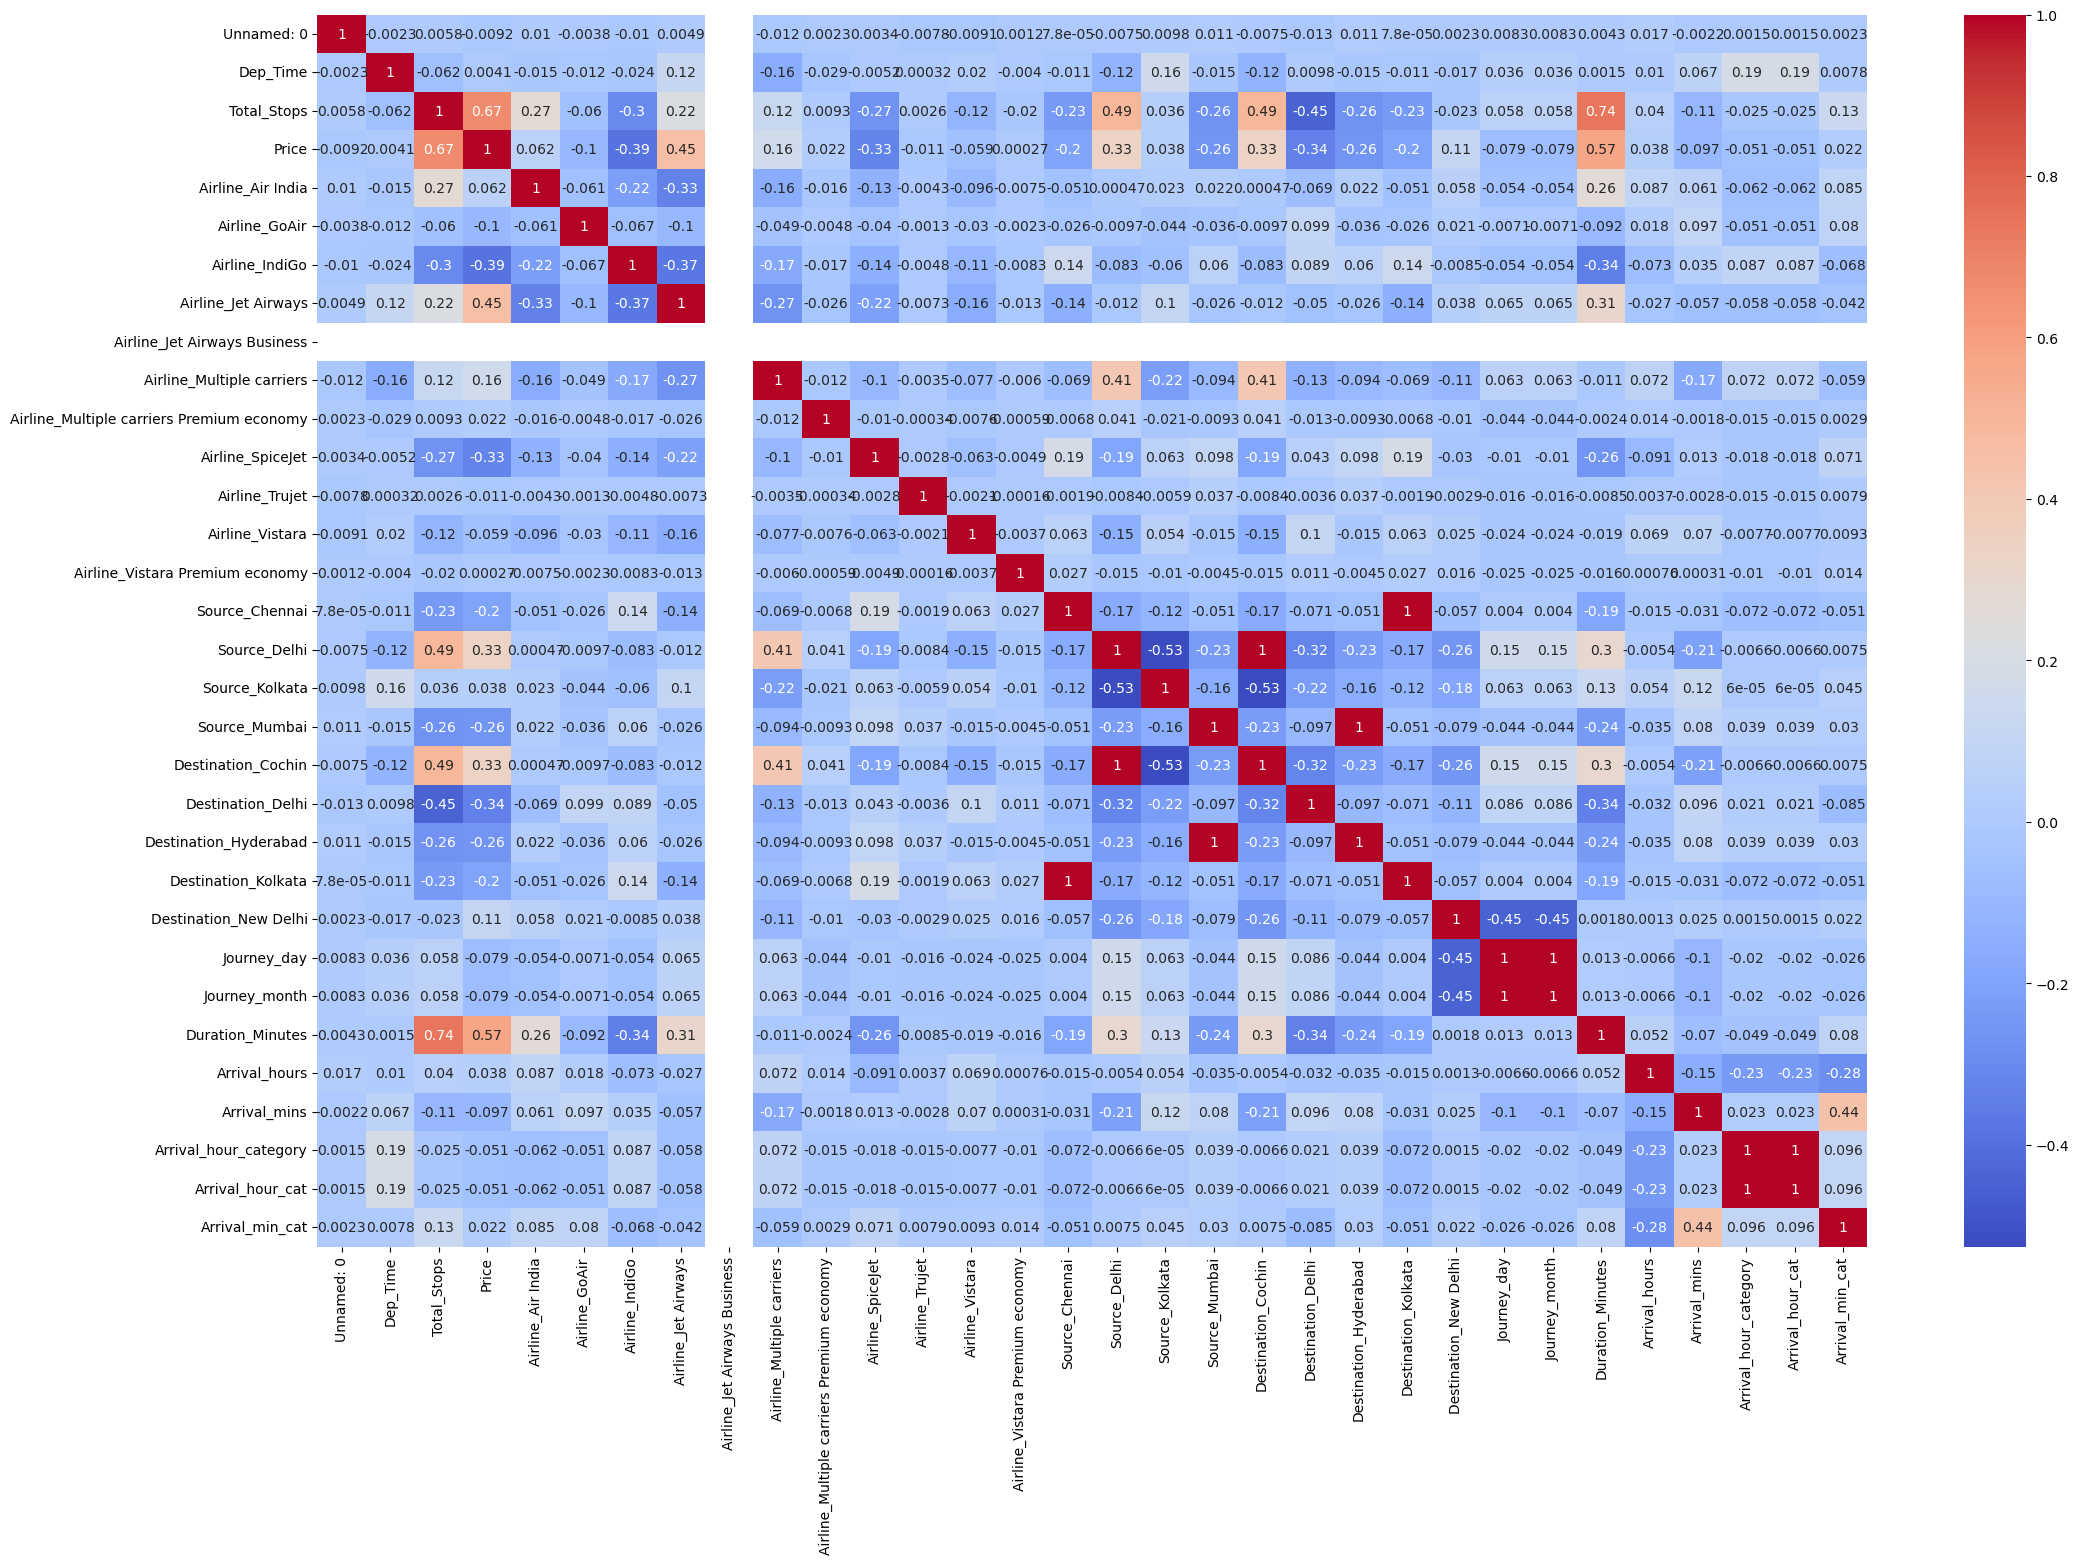

In [61]:
plt.figure(figsize=(25,16))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

Distribution of Flight Prices

In [ ]:
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Flight Price Distribution')
plt.show()

**Exploratory Data Analysis (EDA) & Correlation Analysis Report**

## **1. Introduction**
This report summarizes the exploratory data analysis (EDA) and correlation analysis conducted on the Flight Price Prediction dataset. The primary objective is to identify key factors affecting flight prices and handle multicollinearity before model training.

---

## **2. Data Preprocessing**

### **2.1 Feature Engineering**
- **Date_of_Journey** was converted into **Day, Month, and Year**.
- Categorical variables (**Airline, Source, Destination**) were encoded using **Label Encoding**.
- **Duration** was transformed into numerical format in minutes.
- Irrelevant columns (like **Arrival Time**) were dropped to avoid redundancy.

---

## **3. Correlation Analysis**
### **Key Findings from the Heatmap**
The correlation heatmap revealed the following insights:
- **Total Stops (~0.74 - 0.76 correlation with Price):** Strongest positive correlation, indicating more stops generally increase price.
- **Duration_Minutes (~0.67 correlation with Price):** Longer flights tend to have higher prices.
- **Airline Types:** Premium airlines tend to have a high correlation with price, whereas budget airlines show a weaker relationship.
- **Source & Destination (~0.10 - 0.40 correlation with Price):** These have some impact but are not the most critical features.
- **Dep_Time & Arrival_Time:** Weak correlation, suggesting they might not be significant predictors.

---



This concludes the initial EDA and correlation analysis. The next step involves refining feature selection and proceeding with model training.



# Model Training

In [64]:
from sklearn.model_selection import train_test_split

# Select important features
selected_features = ["Total_Stops", "Duration_Minutes"]  # Add high-correlated Airline, Source, Destination columns
X = data[selected_features]
y = data["Price"]  # Target variable

# Split into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (8470, 2), Test Set: (2118, 2)


In [65]:
#linearregression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")


MAE: 2345.5451729394217
MSE: 8902891.855546117
R² Score: 0.45660732547763927


In [66]:
#randomforest
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R² Score: {r2_rf}")


Random Forest Model Performance:
MAE: 1918.3650452880609
MSE: 6770031.388104491
R² Score: 0.5867875829255743


In [67]:
#xgb
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost R² Score: 0.5717287737828189


In [ ]:
pip install xgboost

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Duration_Minutes', 'Total_Stops']])



In [ ]:
data.columns

In [68]:
#adding airline feature in model training
feature_columns = ["Total_Stops", "Duration_Minutes"] + [col for col in data.columns if "Airline_" in col]


X = data[feature_columns]
y = data["Price"]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))



XGBoost R² Score: 0.6673106632908798


In [84]:
#adding arrival_hours and arrival_minutes feature in model training
feature_columns = ["Total_Stops", "Duration_Minutes"] + [col for col in data.columns if "Airline_" in col] + [col for col in data.columns if "Arrival_" in col]+[col for col in data.columns if "Destination_" in col]


X = data[feature_columns]
y = data["Price"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost R² Score: 0.7036830251305064


In [103]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_


Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}


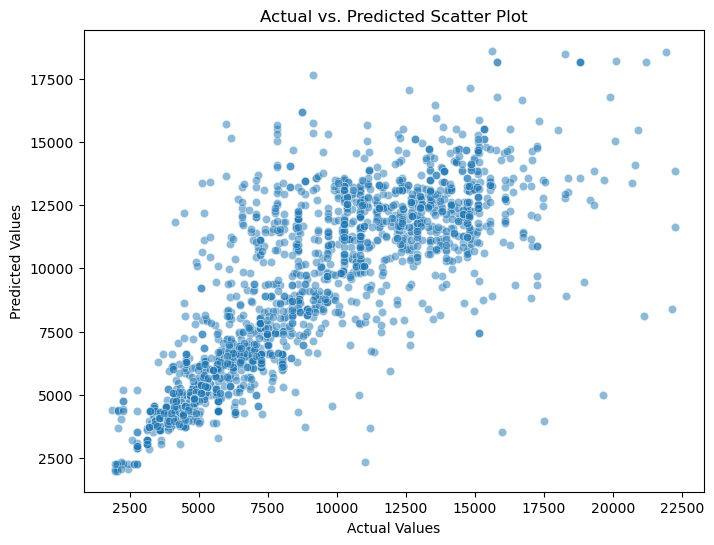

In [106]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)  # alpha for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Scatter Plot")
plt.show()


**Flight Fare Prediction Report**


### **Feature Selection**

- Used **Mutual Information Regression** to determine the most relevant features.
- Features with a score close to zero were considered irrelevant and removed.
- **Top features based on importance:**
  - Duration\_Minutes
  - Total\_Stops
  - Airline\_Type
  - Destination

### **Model Training and Evaluation**

#### **Initial Model: Linear Regression**

- **R² Score:** 0.45
- Scatter plot showed moderate variance.

#### **Improved Model: Random Forest**

- Implemented **Random Forest Regressor** to capture non-linear patterns.
- Provided better generalization and reduced errors.
- **R² Score:** 0.66 Improved slightly but required further tuning.

#### **Final Model: XGBoost**

- Implemented **XGBoost Regressor** for further improvement.
- Performed **Hyperparameter Tuning** to optimize the model.
- **Final R² Score:** Achieved 0.70, showing stable performance.

### **Conclusion and Future Improvements**

- XGBoost provided the best performance, but further tuning may enhance results.
- Feature engineering can be improved by incorporating more domain-specific insights.
- Additional models such as **Neural Networks** or **Stacking Regressors** can be explored.


# Flight Fare Prediction - Model Comparison Report

## **1. Introduction**
This report evaluates three different machine learning models for predicting flight fares: **Linear Regression, Random Forest, and XGBoost**. The objective is to determine which model provides the most accurate and reliable predictions. Each model is assessed based on performance metrics, advantages, and limitations.

---

## **2. Model Performance and Analysis**

### **Linear Regression**
Linear Regression was used as a baseline model due to its simplicity and interpretability. However, its performance was relatively low, achieving an **R² score of 0.45**. The model assumes a linear relationship between features and flight fares, which limited its ability to capture complex patterns in the data. This resulted in higher errors and lower accuracy.

### **Random Forest**
Random Forest improved accuracy significantly, achieving an **R² score of 0.58**. By using multiple decision trees, it was able to capture non-linear relationships and reduce prediction errors. However, it required more computational power and longer training time compared to Linear Regression.

### **XGBoost**
XGBoost outperformed both Linear Regression and Random Forest, achieving an **R² score of 0.70**. It is an optimized gradient boosting algorithm that enhances performance through feature selection, regularization, and efficient tree learning. XGBoost provided the best accuracy with the lowest mean absolute error, making it the most suitable model for flight fare prediction.

---

## **3. Conclusion and Recommendation**

Based on the evaluation, **XGBoost is the most effective model for predicting flight fares**. It demonstrated superior accuracy, reduced error rates, and better handling of complex patterns in the data. While Random Forest also performed better than Linear Regression, XGBoost was more efficient and provided better generalization. Linear Regression, though fast and easy to interpret, was not suitable due to its inability to capture non-r refinements are needed.



Challenges Faced**

### **1. Data Preprocessing Issues**
Handling missing values, categorical feature encoding, and feature selection required multiple iterations to ensure optimal data quality for training the models.

### **2. Model Overfitting**
While Random Forest and XGBoost provided better results than Linear Regression, they initially suffered from overfitting. This was mitigated by hyperparameter tuning and cross-validation.

### **3. Feature Importance and Selection**
Determining the most relevant features was challenging, as some categorical variables had low mutual information scores but still impacted the final prediction. Careful feature selection helped refine the model.

### **4. Computational Complexity**
Random Forest and XGBoost required higher computational resources, leading to longer training times. Optimizing hyperparameters increased processing time but improved overall model performance.

### **5. Model Evaluation & Fine-Tuning**
Choosing the right metrics and improving performance through tuning required multiple experiments. Adjusting learning rates, tree depth, and other hyperparameters played a key roln improving finements are needed.

